#**EDA**

In [1]:
!pip install xgboost lightgbm catboost

In [2]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load dataset
df = pd.read_csv("diabetes-dataset.csv")

In [4]:
#melihat gambaran awal data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#melihat nilai kosong
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Melihat tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#melihat statistik data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\albert\AppData\Local\Temp\ipykernel_25704\3711572727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Outcome", data=df, palette="mako")


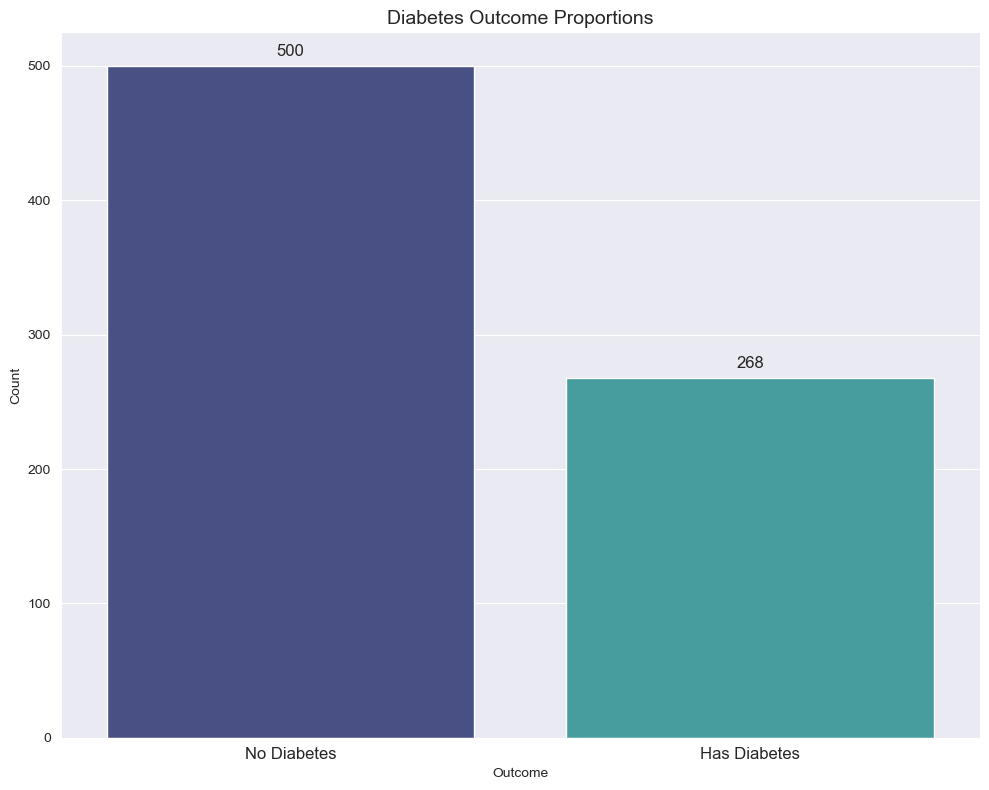

In [8]:
# Visualisasi distribusi outcome
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")

ax = sns.countplot(x="Outcome", data=df, palette="mako")

# Tambahkan label bar secara eksplisit
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=12)

# Atur label x-axis
plt.xticks(ticks=[0, 1], labels=["No Diabetes", "Has Diabetes"], fontsize=12)
plt.title("Diabetes Outcome Proportions", fontsize=14)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\albert\AppData\Local\Temp\ipykernel_25704\1789768296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=numerical_df[column], palette="Blues", ax=axes[i])
C:\Users\albert\AppData\Local\Temp\ipykernel_25704\1789768296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=numerical_df[column], palette="Blues", ax=axes[i])
C:\Users\albert\AppData\Local\Temp\ipykernel_25704\1789768296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=numerical_df[column], palette="Blues", ax=axes[i])
C:\Users\albert\AppData\Local\Temp\ipykerne

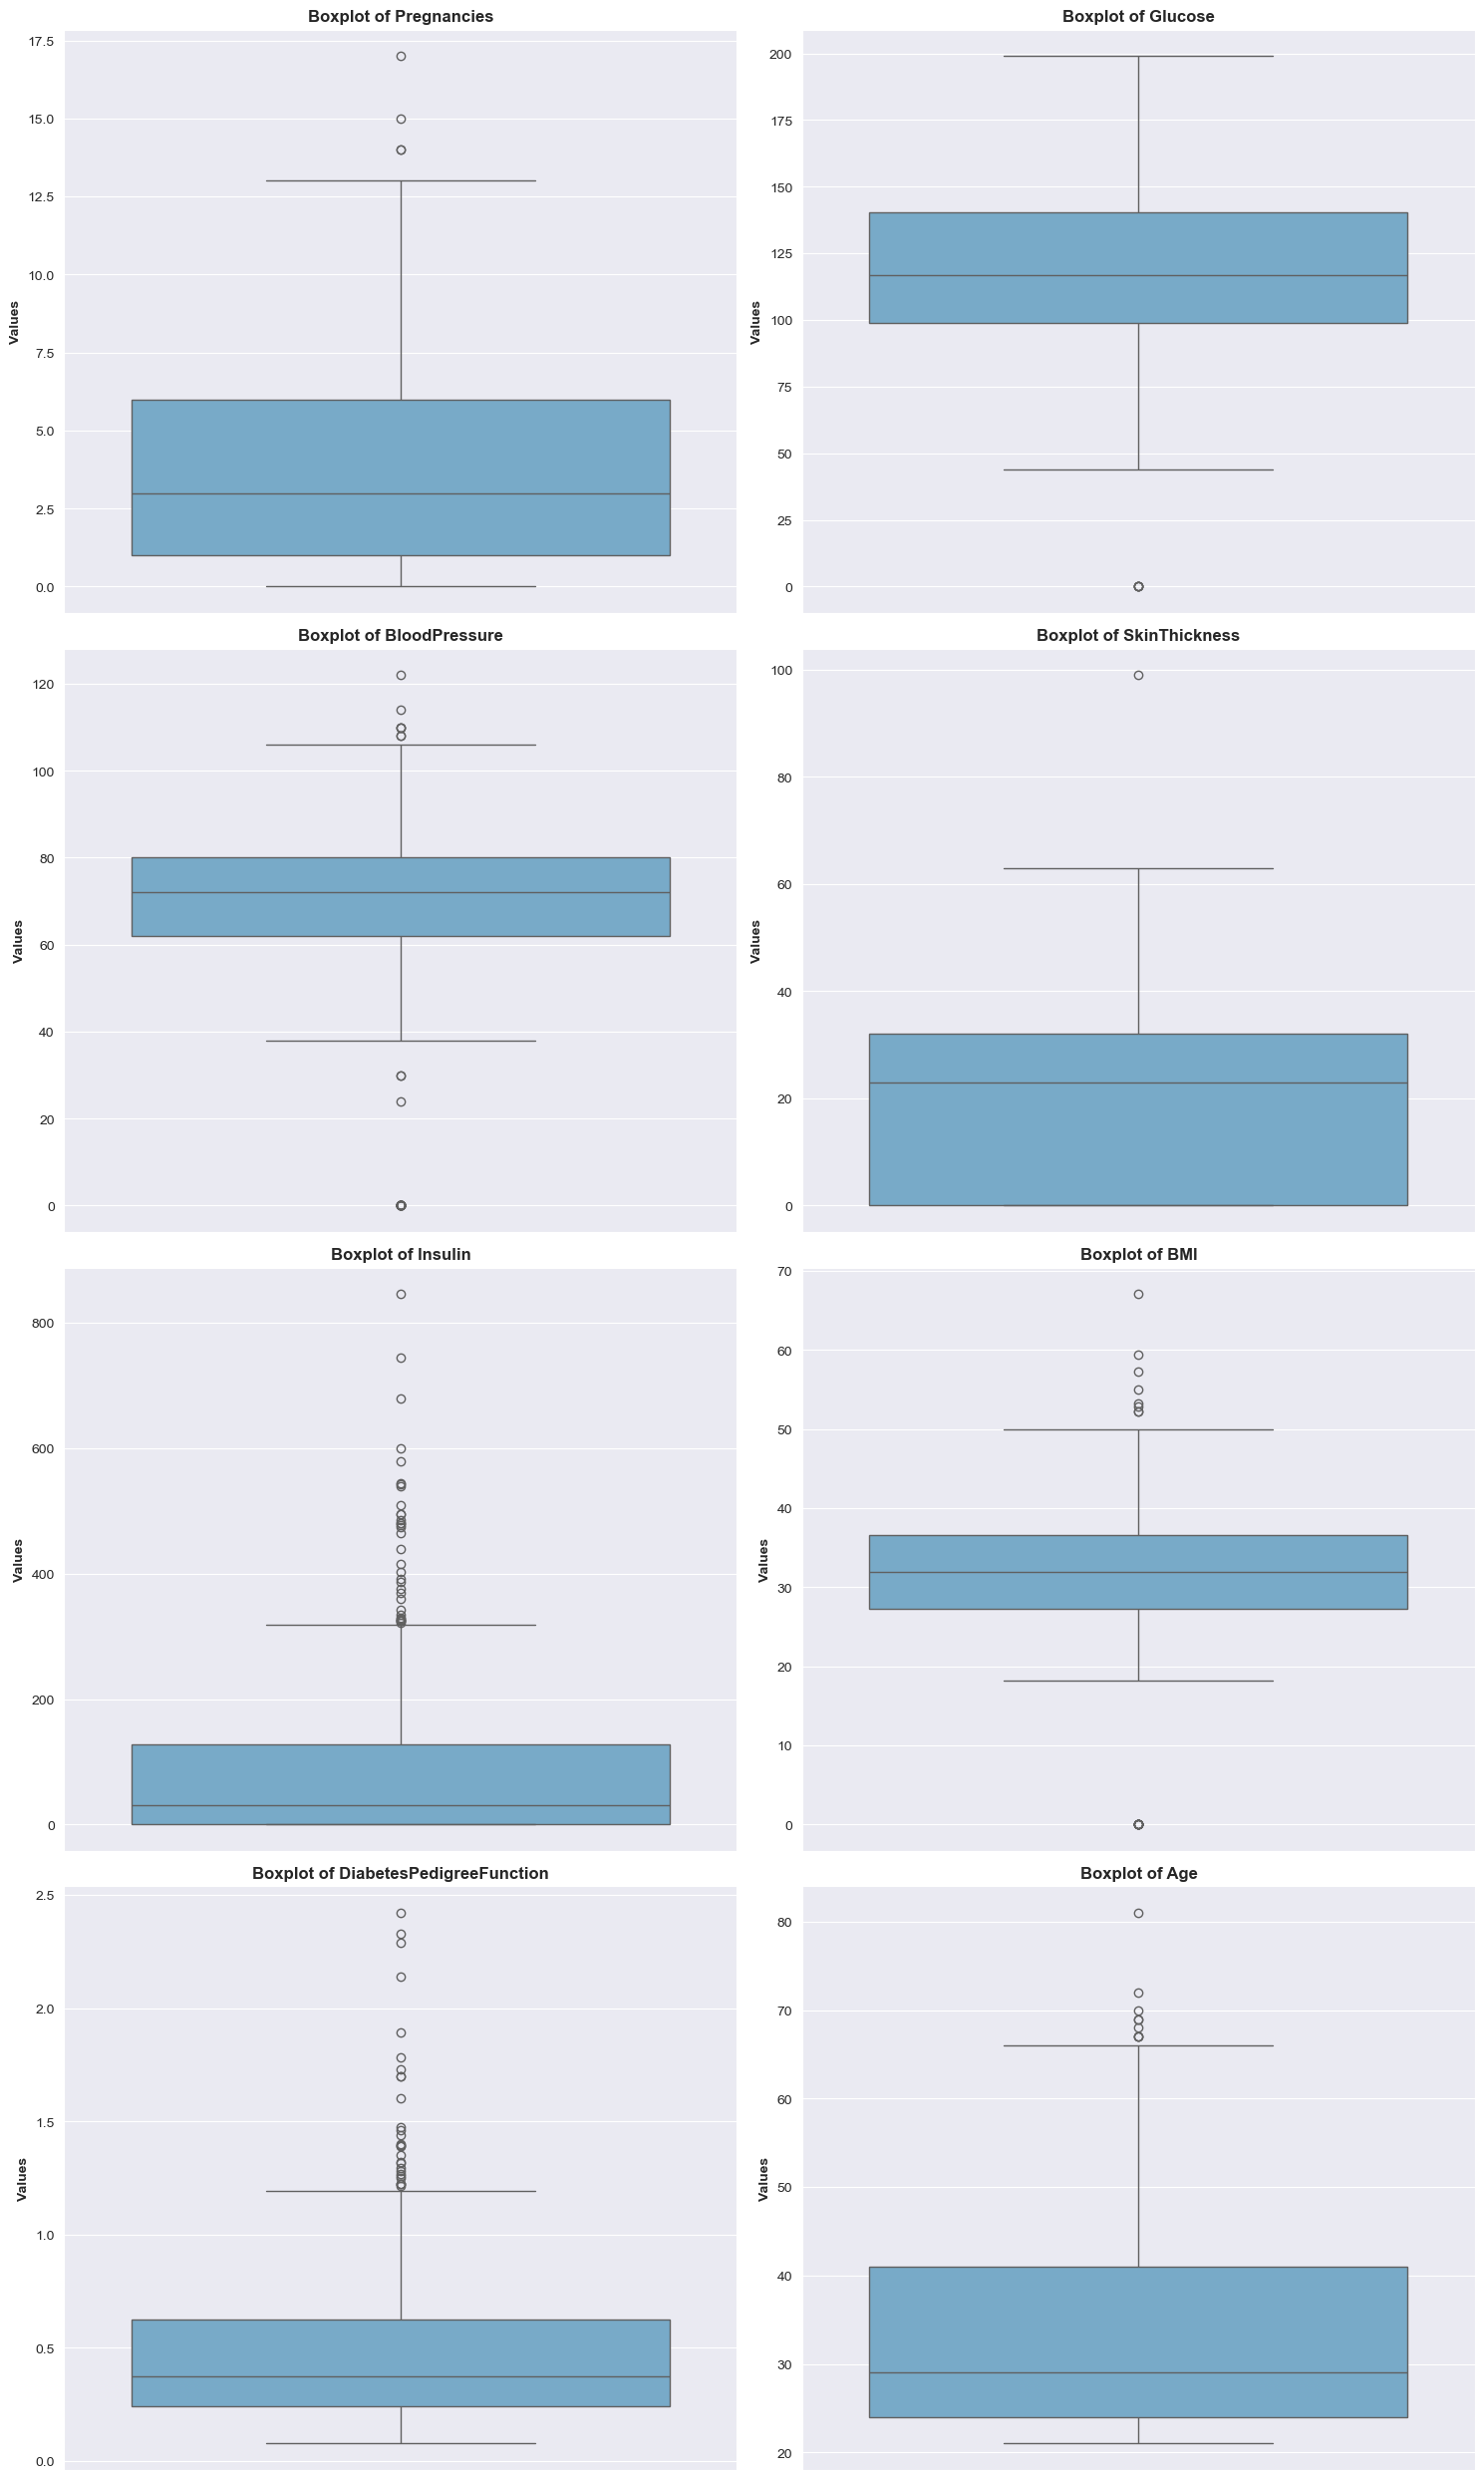

In [9]:
#Menampilkan boxplot untuk setiap fitur numerik dalam dataset kecuali target Outcome,
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df.drop("Outcome", axis = 1)
# Ambil Nama Kolom Numerik
num_columns = numerical_df.columns

# Buat Subplot Grid untuk Boxplot
fig, axes = plt.subplots(nrows=len(num_columns)//2 + len(num_columns)%2, ncols=2, figsize=(15, 25))
axes = axes.flatten()  # Flatten in case of 1 row

# Looping: Plot Boxplot untuk Setiap Fitur
for i, column in enumerate(num_columns):
    sns.boxplot(y=numerical_df[column], palette="Blues", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}", fontweight='bold', fontsize=12)
    axes[i].set_ylabel("Values", fontweight='bold', fontsize=10)

# Menghapus Plot Kosong (Jika Jumlah Kolom Ganjil)
if len(num_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

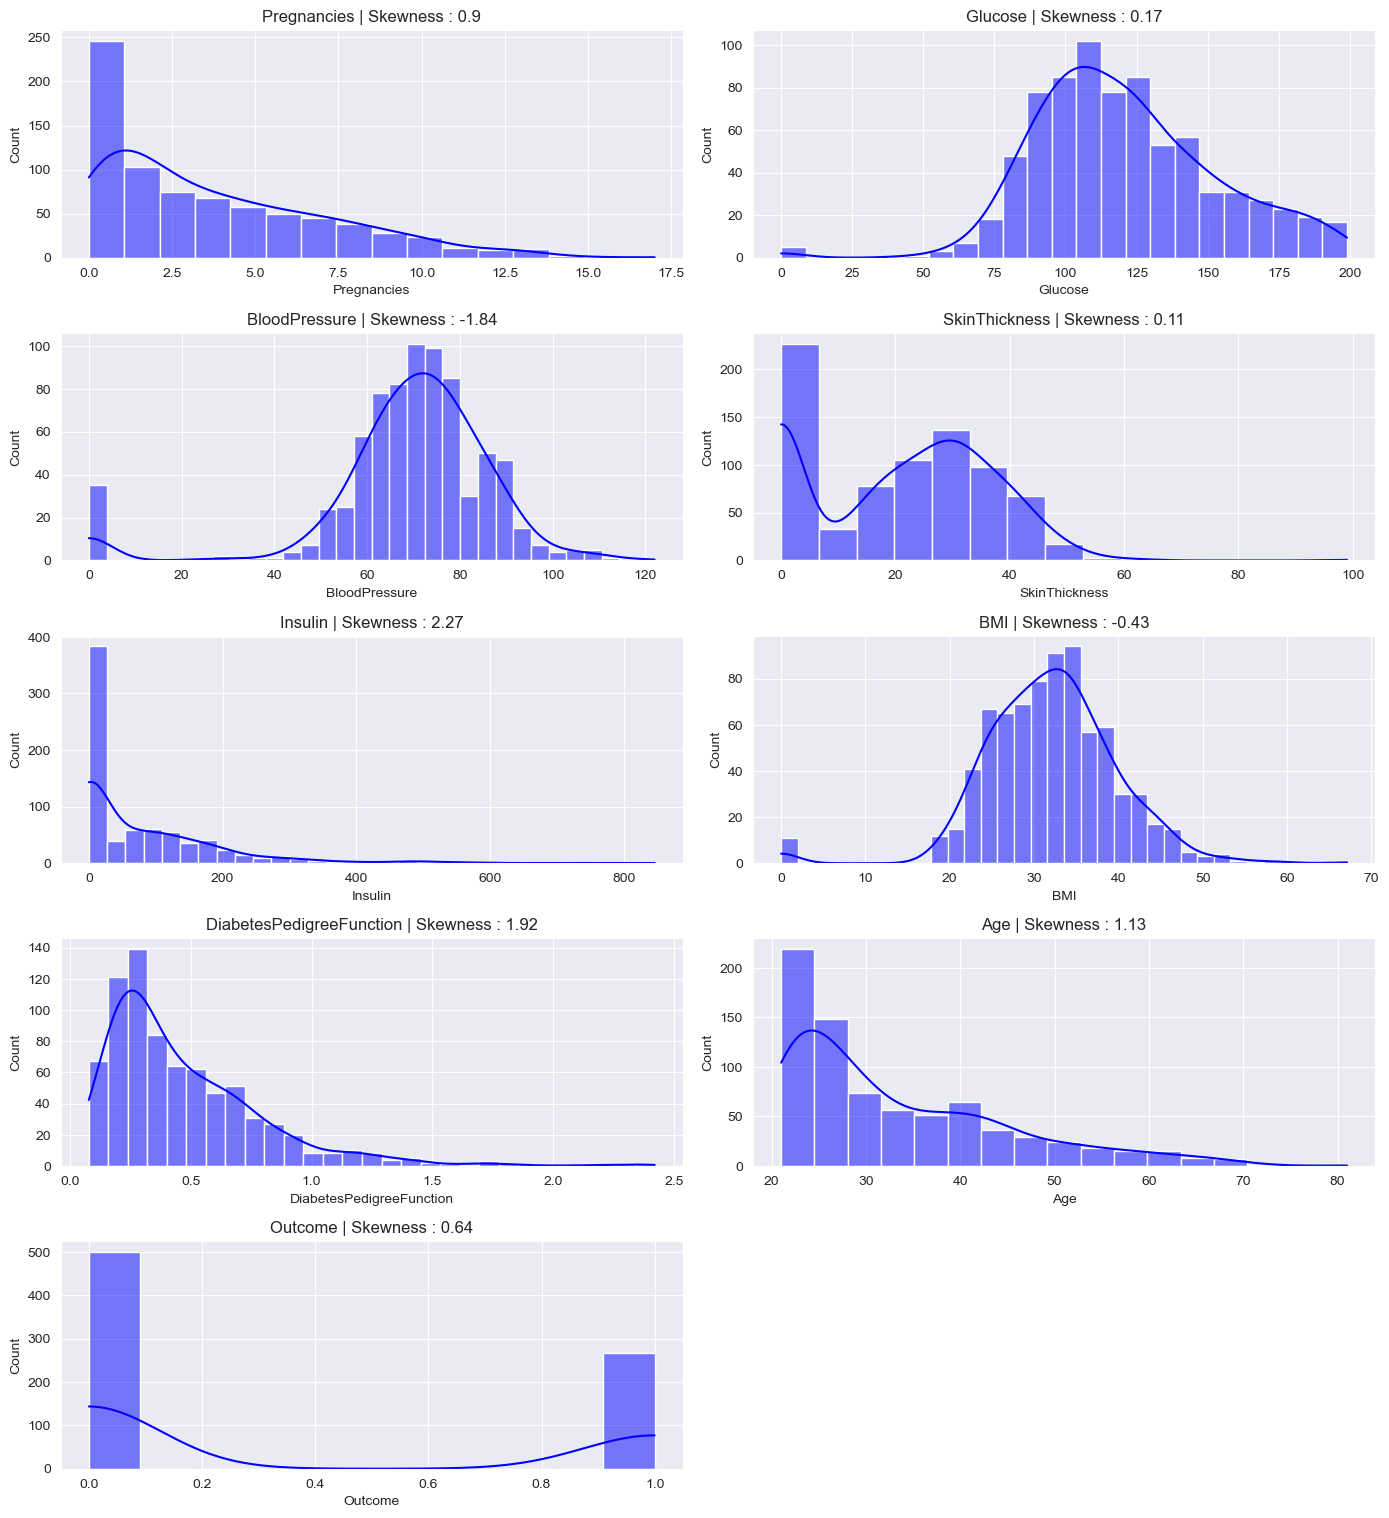

In [10]:
# visualisasi distribusi data dan mengecek skewness (kemiringan distribusi).
#Atur Tampilan Grid Visual
sns.set_style("darkgrid")
# Ambil Kolom Numerik
numerical_columns = df.select_dtypes(include = ["int64", "float64"]).columns
#Siapkan Ukuran Figure
plt.figure(figsize = (14, len(numerical_columns) * 3))
#Looping Untuk Membuat Histogram + KDE Tiap Fitur
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde = True, color="blue")
    plt.title(f"{feature} | Skewness : {round(df[feature].skew(), 2)}")
#Merapikan Layout dan Tampilkan
plt.tight_layout()
plt.show()

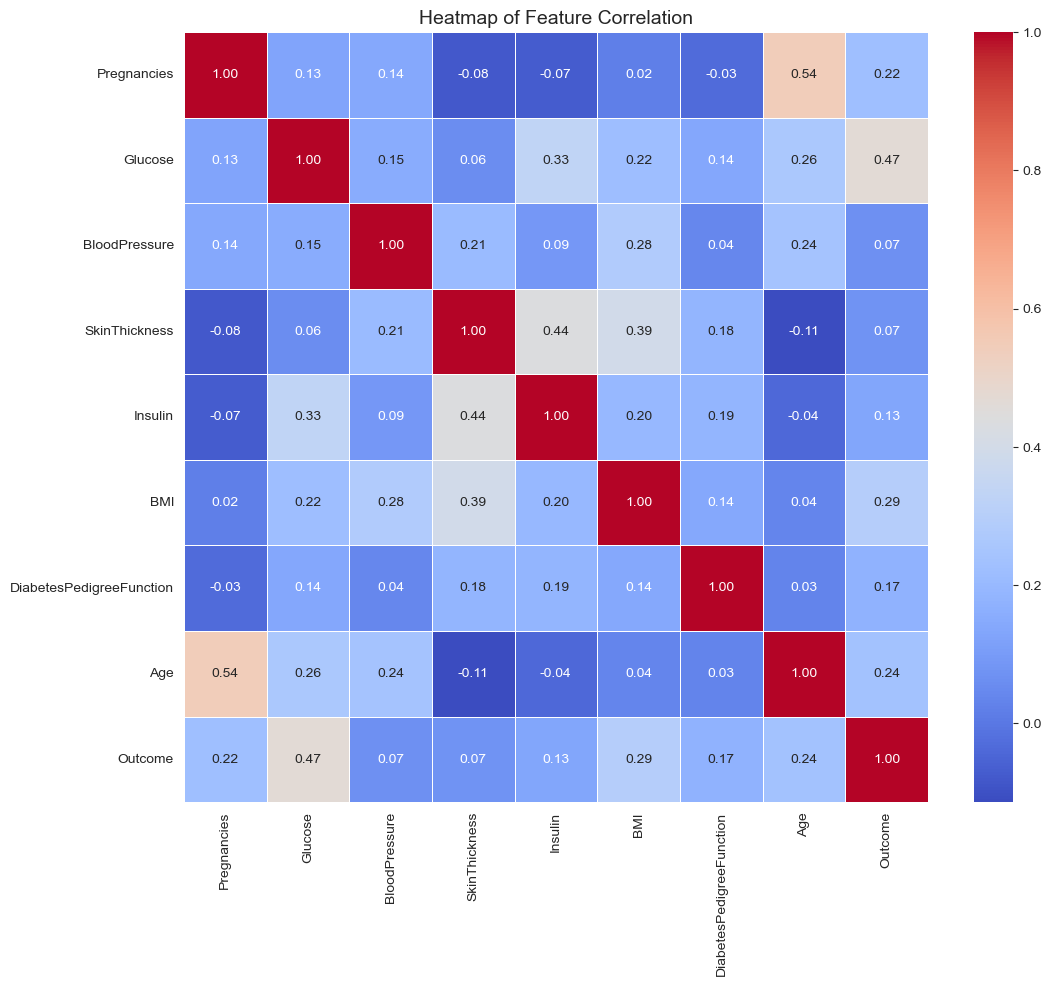

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlation', fontsize=14)
plt.show()

#**Data Pre Processing**

In [12]:
# Ganti 0 menjadi NaN untuk kolom medis yang tidak boleh nol
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Imputasi median berdasarkan Outcome
for col in cols_with_zero:
    for outcome in [0, 1]:
        median_val = df[df['Outcome'] == outcome][col].median()
        df.loc[(df['Outcome'] == outcome) & (df[col].isna()), col] = median_val

In [13]:
# Split fitur dan target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

#**Modelling default**

In [14]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = lgb.LGBMClassifier(random_state=42)
catb_model = CatBoostClassifier(verbose=0, random_state=42) # verbose=0 untuk tidak menampilkan output training

# Fungsi evaluasi model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Latih model tambahan pada data hasil SMOTE
rf_model.fit(X_train_res, y_train_res)
xgb_model.fit(X_train_res, y_train_res)
lgbm_model.fit(X_train_res, y_train_res)
catb_model.fit(X_train_res, y_train_res)

# Evaluasi 4 model tambahan
evaluate_model("Random Forest", rf_model, X_test_scaled, y_test)
evaluate_model("XGBoost", xgb_model, X_test_scaled, y_test)
evaluate_model("LightGBM", lgbm_model, X_test_scaled, y_test)
evaluate_model("CatBoost", catb_model, X_test_scaled, y_test)


c:\Users\albert\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:15:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1135
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

#**Testing**

In [15]:
# Daftar fitur yang digunakan
feature_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Fungsi untuk mengambil input dari user
def get_user_input():
    print("Masukkan data Anda untuk prediksi diabetes:")
    user_input = {}
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_input[feature] = value
                break
            except ValueError:
                print("Input tidak valid. Masukkan angka.")
    return pd.DataFrame([user_input])

# Ambil input pengguna
user_df = get_user_input()

# Scaling data input menggunakan scaler yang sudah dilatih
user_data_scaled = scaler.transform(user_df)

# Prediksi menggunakan model LightGBM
prediction = lgbm_model.predict(user_data_scaled)
prediction_proba = lgbm_model.predict_proba(user_data_scaled)[:, 1]

# Tampilkan hasil prediksi
print("\n--- Hasil Prediksi ---")
if prediction[0] == 1:
    print("Hasil: Kemungkinan memiliki diabetes.")
else:
    print("Hasil: Kemungkinan tidak memiliki diabetes.")

print(f"Probabilitas positif diabetes: {prediction_proba[0]:.4f}")


Masukkan data Anda untuk prediksi diabetes:

--- Hasil Prediksi ---
Hasil: Kemungkinan tidak memiliki diabetes.
Probabilitas positif diabetes: 0.0015


In [16]:
import joblib
import os

# Pastikan folder model ada
os.makedirs("model", exist_ok=True)

# Simpan model
joblib.dump(lgbm_model, "model/model.pkl")
joblib.dump(scaler, 'model/scaler.pkl')


['model/scaler.pkl']